<a href="https://colab.research.google.com/github/cwy20030/Machine-Learning-Workshop/blob/master/Neural_Nets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import sklearn.metrics
import matplotlib.pyplot as plt
from copy import deepcopy

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 2

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_test_ = deepcopy(y_test)

60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 9s 156us/step - loss: 0.2234 - acc: 0.9325 - val_loss: 0.1225 - val_acc: 0.9618
Epoch 2/2
60000/60000 [==============================] - 9s 145us/step - loss: 0.0816 - acc: 0.9747 - val_loss: 0.0747 - val_acc: 0.9770


In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07469135194052942
Test accuracy: 0.977


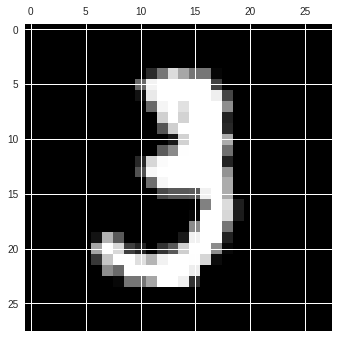

[[1.7360115e-11 1.3651788e-07 1.6879129e-08 9.9993336e-01 8.9364693e-10
  1.9758841e-06 1.9351587e-14 2.8962557e-09 4.3460577e-07 6.4042855e-05]]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
image_index = 10
plt.gray()
plt.matshow(x_train[image_index,:].reshape(28,28))
plt.show()
print(model.predict(x_train[image_index,:].reshape(1,784)))
print(y_train[image_index])

In [0]:
sklearn.metrics.confusion_matrix(y_test_,model.predict_classes(x_test))

array([[ 968,    1,    0,    1,    1,    2,    1,    1,    2,    3],
       [   0, 1126,    3,    0,    0,    1,    2,    0,    3,    0],
       [   3,    3, 1004,    3,    9,    0,    1,    5,    4,    0],
       [   0,    0,    6,  993,    0,    0,    0,    5,    2,    4],
       [   0,    1,    0,    0,  968,    0,    4,    2,    1,    6],
       [   2,    0,    0,   15,    1,  860,    5,    0,    7,    2],
       [   5,    3,    1,    1,    5,    6,  933,    0,    4,    0],
       [   1,    8,    7,    1,    0,    0,    0, 1001,    2,    8],
       [   1,    1,    3,    7,    2,    6,    0,    7,  944,    3],
       [   0,    7,    0,    5,    8,   10,    0,    5,    1,  973]])